### Question
Clustering: K-Means <br>
Dataset: Cities_r2.csv  <br>
Apply Data pre-processing (Label Encoding , Data Transformation....) techniques
if necessary. <br>
1. Apply K-Means clustering algorithms (based on total_graduates) to find the group
of customers. <br>
2. Apply K-Means clustering algorithms (based on
effective_literacy_rate_total column) to find the group of customers.

In [91]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [92]:
# Load the dataset
df = pd.read_csv('Cities_r2.csv')

In [93]:
# Select features for the first clustering (total_graduates)
X1 = df[['total_graduates']]

In [94]:
# Apply Standard Scaling
X1_scaled = StandardScaler().fit_transform(X1)

In [95]:
# Apply K-Means clustering for total_graduates
kmeans1 = KMeans(n_clusters=3, random_state=0)
df['cluster_total_graduates'] = kmeans1.fit_predict(X1_scaled)

c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Text(0.5, 1.0, 'K-Means Clustering - total_graduates')

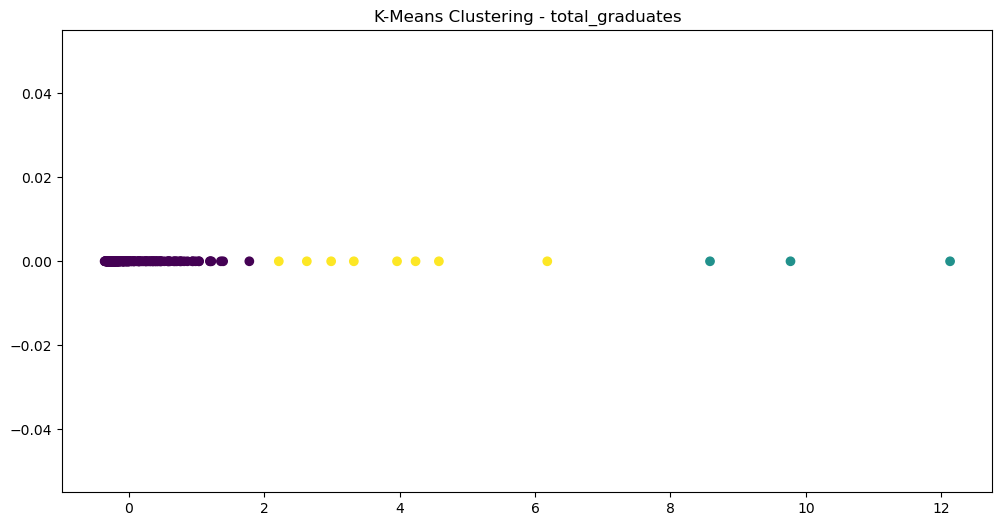

In [104]:
# Visualize the clusters
plt.figure(figsize=(12, 6))

# Plot for total_graduates
plt.scatter(X1_scaled[:, 0], [0] * len(X1_scaled), c=df['cluster_total_graduates'])
plt.title('K-Means Clustering - total_graduates')

In [97]:
# Select features for the second clustering (effective_literacy_rate_total)
X2 = df[['effective_literacy_rate_total']]

In [98]:
# Apply Standard Scaling
X2_scaled = StandardScaler().fit_transform(X2)

In [99]:
# Apply K-Means clustering for effective_literacy_rate_total
kmeans2 = KMeans(n_clusters=3, random_state=42)
df['cluster_effective_literacy_rate'] = kmeans2.fit_predict(X2_scaled)

c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\shaur\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


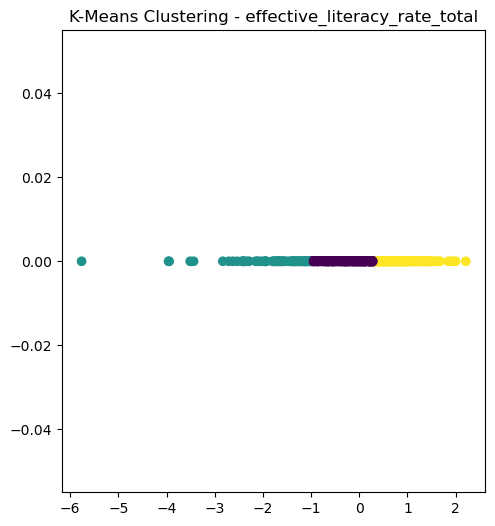

In [100]:
# Visualize the clusters
plt.figure(figsize=(12, 6))

# Plot for effective_literacy_rate_total
plt.subplot(1, 2, 2)
plt.scatter(X2_scaled[:, 0], [0] * len(X2_scaled), c=df['cluster_effective_literacy_rate'], cmap='viridis')
plt.title('K-Means Clustering - effective_literacy_rate_total')

plt.show()